# Treemap - Hierarchical Data Visualization

**Use Case**: Visualize hierarchical data with proportional areas (file systems, budget breakdowns, market share, organizational structures)

This notebook demonstrates how to create effective treemaps for visualizing hierarchical data with proportional representation.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Try to import squarify for treemap creation
try:
    import squarify  # For creating treemaps
    SQUARIFY_AVAILABLE = True
    print("✅ squarify imported successfully")
except ImportError:
    SQUARIFY_AVAILABLE = False
    print("⚠️  squarify not available - treemap examples will be simulated")
    print("   Install with: pip install squarify")

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set3")

# Set random seed for reproducibility
np.random.seed(42)

print("Treemap visualization libraries loaded!")
if SQUARIFY_AVAILABLE:
    print("Note: Full treemap functionality available")
else:
    print("Note: Using fallback visualizations (install squarify for full functionality)")


⚠️  squarify not available - treemap examples will be simulated
   Install with: pip install squarify
Treemap visualization libraries loaded!
Note: Using fallback visualizations (install squarify for full functionality)


In [3]:
# Create sample hierarchical datasets
# 1. Company Budget Breakdown
budget_data = [
    # (Category, Subcategory, Amount, Description)
    ('Engineering', 'Software Development', 1500000, 'Core product development'),
    ('Engineering', 'Infrastructure', 600000, 'Servers and DevOps'),
    ('Engineering', 'Quality Assurance', 400000, 'Testing and QA processes'),
    ('Engineering', 'Research & Development', 300000, 'Innovation projects'),
    
    ('Marketing', 'Digital Marketing', 800000, 'Online advertising and SEO'),
    ('Marketing', 'Content Creation', 400000, 'Blog, videos, and materials'),
    ('Marketing', 'Events & PR', 300000, 'Conferences and public relations'),
    ('Marketing', 'Brand Management', 200000, 'Brand strategy and design'),
    
    ('Sales', 'Field Sales', 600000, 'Outside sales team'),
    ('Sales', 'Inside Sales', 300000, 'Phone and online sales'),
    ('Sales', 'Sales Operations', 200000, 'CRM and sales support'),
    ('Sales', 'Customer Success', 400000, 'Post-sale customer management'),
    
    ('Operations', 'Human Resources', 500000, 'Recruiting and HR management'),
    ('Operations', 'Finance & Accounting', 400000, 'Financial operations'),
    ('Operations', 'Legal & Compliance', 200000, 'Legal services and compliance'),
    ('Operations', 'General & Administrative', 300000, 'Office operations'),
    
    ('Facilities', 'Office Rent', 600000, 'Physical office space'),
    ('Facilities', 'Equipment', 200000, 'Computers and office equipment'),
    ('Facilities', 'Utilities', 100000, 'Internet, electricity, etc.'),
]

budget_df = pd.DataFrame(budget_data, columns=['Department', 'Category', 'Amount', 'Description'])

# 2. Global Market Share by Region and Product
market_data = [
    ('North America', 'Product A', 450, 'Premium segment'),
    ('North America', 'Product B', 320, 'Mid-market segment'),
    ('North America', 'Product C', 180, 'Budget segment'),
    ('North America', 'Services', 150, 'Professional services'),
    
    ('Europe', 'Product A', 380, 'Premium segment'),
    ('Europe', 'Product B', 420, 'Mid-market segment'),
    ('Europe', 'Product C', 250, 'Budget segment'),
    ('Europe', 'Services', 200, 'Professional services'),
    
    ('Asia Pacific', 'Product A', 200, 'Premium segment'),
    ('Asia Pacific', 'Product B', 350, 'Mid-market segment'),
    ('Asia Pacific', 'Product C', 400, 'Budget segment'),
    ('Asia Pacific', 'Services', 100, 'Professional services'),
    
    ('Latin America', 'Product A', 80, 'Premium segment'),
    ('Latin America', 'Product B', 150, 'Mid-market segment'),
    ('Latin America', 'Product C', 180, 'Budget segment'),
    ('Latin America', 'Services', 60, 'Professional services'),
    
    ('Middle East & Africa', 'Product A', 60, 'Premium segment'),
    ('Middle East & Africa', 'Product B', 100, 'Mid-market segment'),
    ('Middle East & Africa', 'Product C', 120, 'Budget segment'),
    ('Middle East & Africa', 'Services', 40, 'Professional services'),
]

market_df = pd.DataFrame(market_data, columns=['Region', 'Product', 'Revenue', 'Segment'])

# 3. Website Analytics - Page Visits Hierarchy
web_data = [
    ('Homepage', 'Main', 25000, 'Landing page'),
    ('Products', 'Product A Page', 8000, 'Product information'),
    ('Products', 'Product B Page', 6000, 'Product information'),
    ('Products', 'Product C Page', 4000, 'Product information'),
    ('Products', 'Pricing Page', 5000, 'Pricing information'),
    ('Products', 'Features Page', 3000, 'Feature details'),
    
    ('Blog', 'Tech Articles', 4500, 'Technical content'),
    ('Blog', 'Industry News', 3000, 'Industry updates'),
    ('Blog', 'Company Updates', 2000, 'Company news'),
    ('Blog', 'Tutorials', 2500, 'How-to guides'),
    
    ('Support', 'Documentation', 3500, 'Technical docs'),
    ('Support', 'FAQ', 2000, 'Frequently asked questions'),
    ('Support', 'Contact', 1500, 'Contact information'),
    ('Support', 'Downloads', 1000, 'Software downloads'),
    
    ('About', 'Company', 1200, 'Company information'),
    ('About', 'Team', 800, 'Team members'),
    ('About', 'Careers', 1000, 'Job openings'),
    ('About', 'Investors', 400, 'Investor relations'),
]

web_df = pd.DataFrame(web_data, columns=['Section', 'Page', 'Visits', 'Description'])

# 4. File System Usage
file_data = [
    ('Documents', 'Work Files', 15000, 'Business documents'),
    ('Documents', 'Personal', 8000, 'Personal documents'),
    ('Documents', 'Archives', 12000, 'Old files'),
    
    ('Media', 'Photos', 45000, 'Photo collection'),
    ('Media', 'Videos', 35000, 'Video files'),
    ('Media', 'Audio', 8000, 'Music and audio'),
    
    ('Software', 'Applications', 25000, 'Installed programs'),
    ('Software', 'Games', 18000, 'Video games'),
    ('Software', 'Development', 12000, 'Programming tools'),
    
    ('System', 'OS Files', 30000, 'Operating system'),
    ('System', 'Temp Files', 5000, 'Temporary files'),
    ('System', 'Cache', 8000, 'System cache'),
    
    ('Downloads', 'Recent', 3000, 'Recent downloads'),
    ('Downloads', 'Software', 7000, 'Downloaded software'),
    ('Downloads', 'Media', 4000, 'Downloaded media'),
]

file_df = pd.DataFrame(file_data, columns=['Category', 'Type', 'Size_MB', 'Description'])

print("Sample hierarchical datasets created:")
print(f"Company Budget: {len(budget_df)} line items across {budget_df['Department'].nunique()} departments")
print(f"Market Share: {len(market_df)} segments across {market_df['Region'].nunique()} regions")
print(f"Website Analytics: {len(web_df)} pages across {web_df['Section'].nunique()} sections")
print(f"File System: {len(file_df)} file types across {file_df['Category'].nunique()} categories")


Sample hierarchical datasets created:
Company Budget: 19 line items across 5 departments
Market Share: 20 segments across 5 regions
Website Analytics: 18 pages across 5 sections
File System: 15 file types across 5 categories


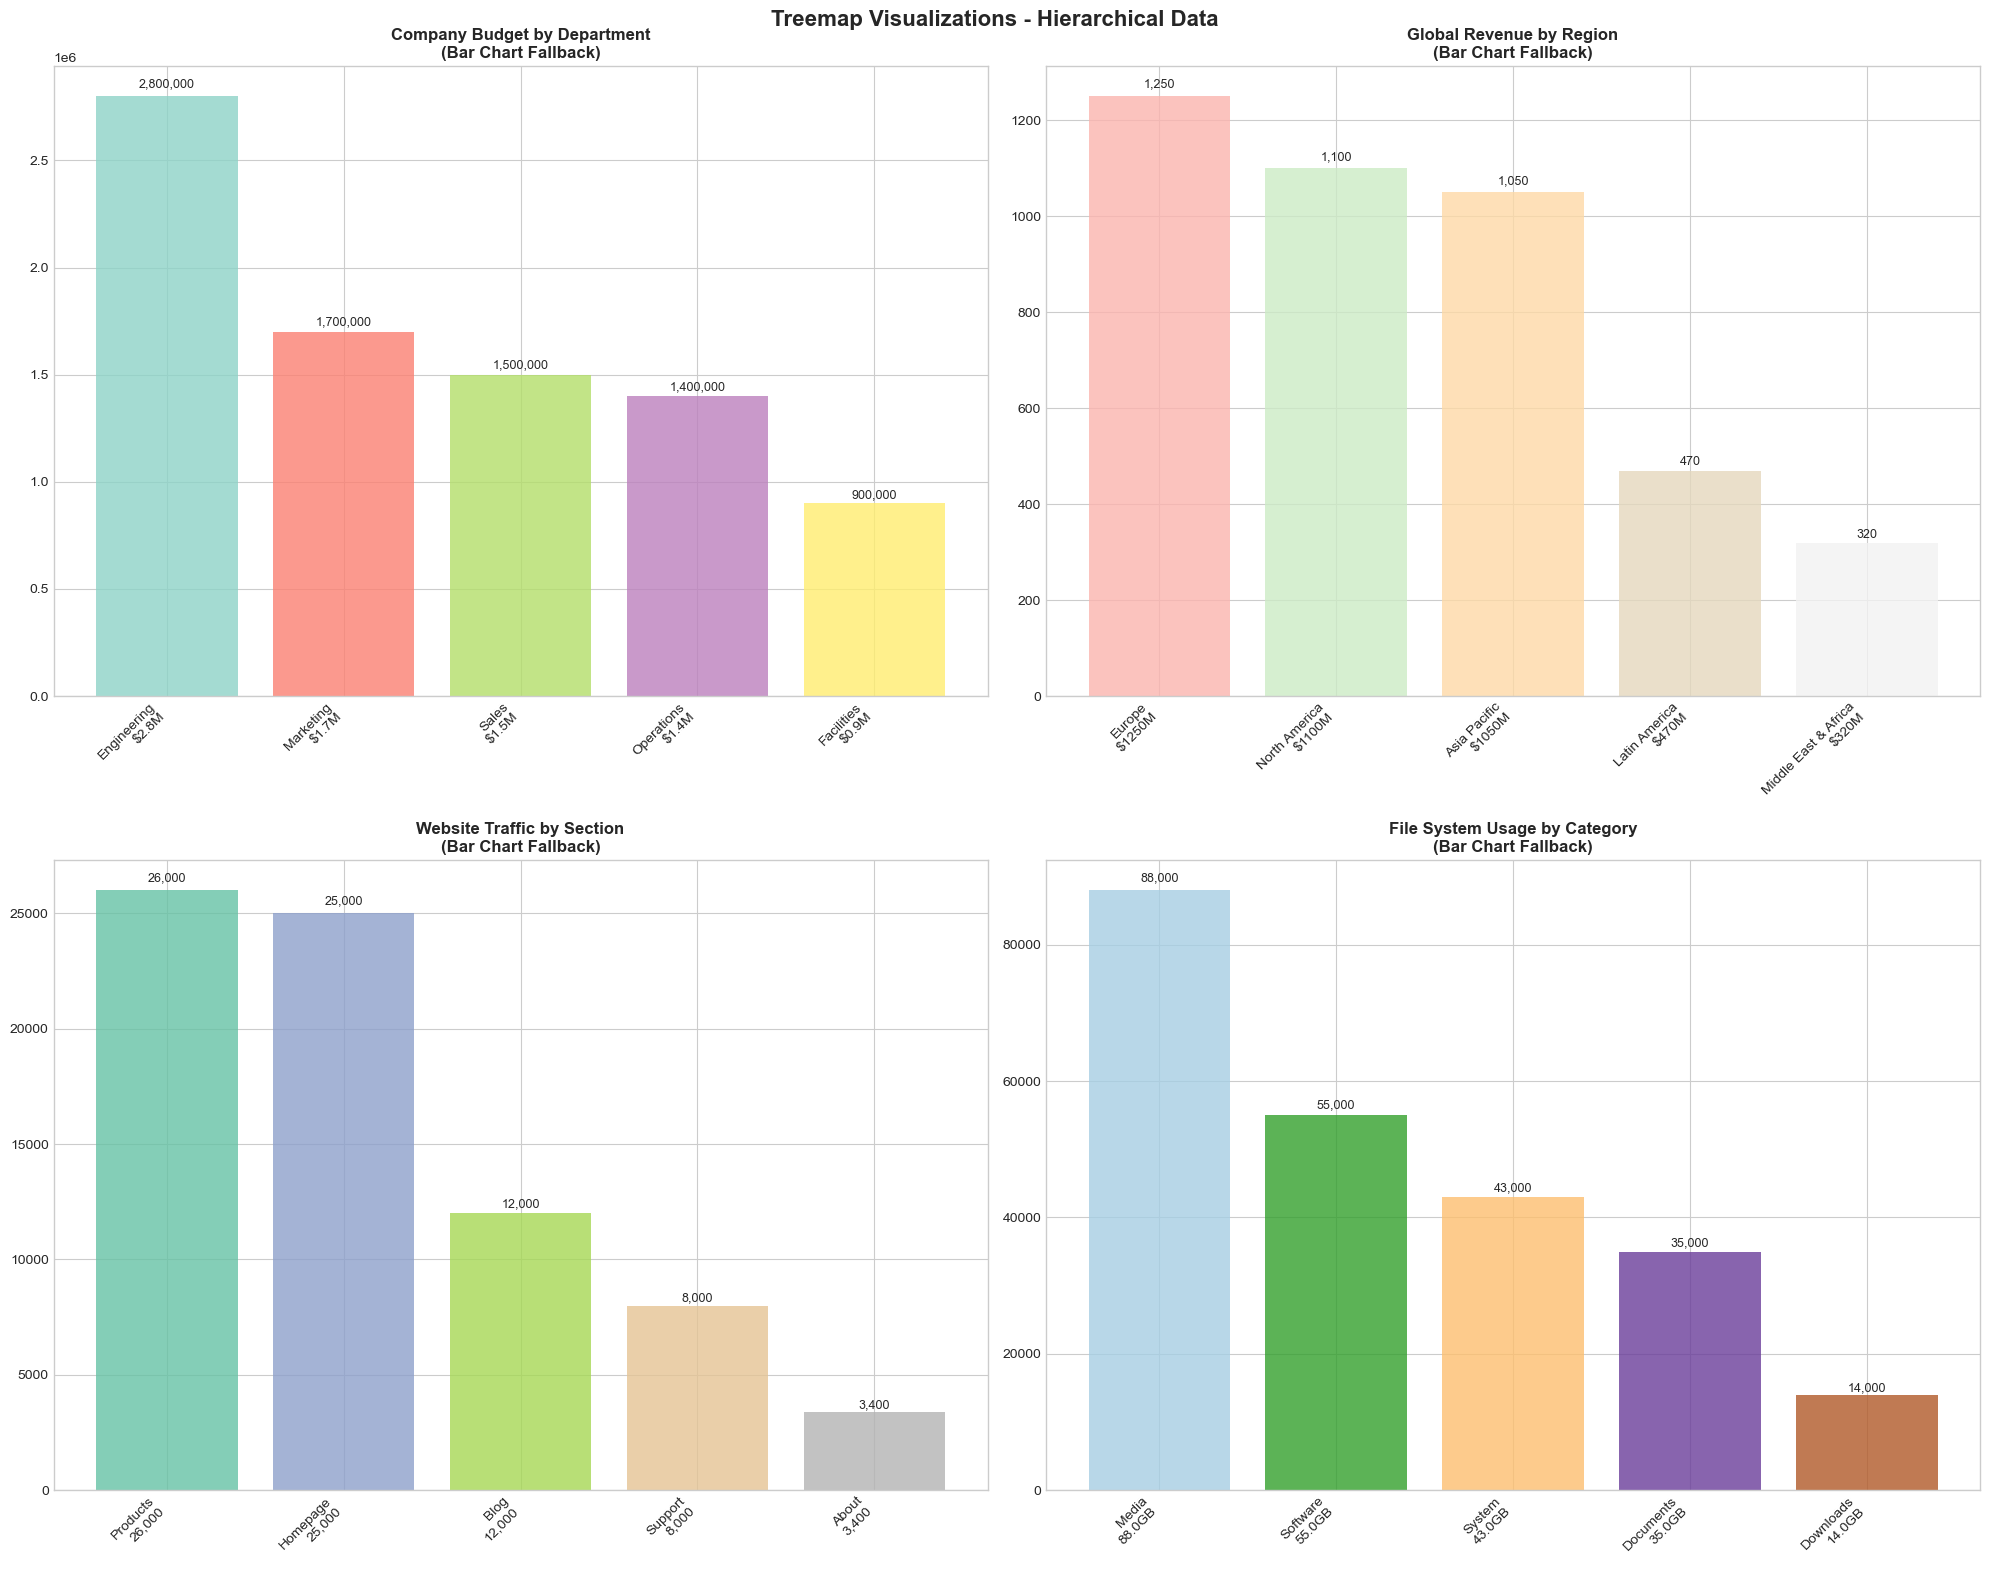

In [4]:
# Fallback function for when squarify is not available
def create_fallback_treemap(sizes, labels, colors, ax, title):
    """Create a simple bar chart as fallback when squarify is not available"""
    # Sort by size for better visualization
    data = list(zip(sizes, labels, colors))
    data.sort(key=lambda x: x[0], reverse=True)
    sizes_sorted, labels_sorted, colors_sorted = zip(*data)
    
    bars = ax.bar(range(len(sizes_sorted)), sizes_sorted, color=colors_sorted, alpha=0.8)
    ax.set_xticks(range(len(labels_sorted)))
    ax.set_xticklabels(labels_sorted, rotation=45, ha='right')
    ax.set_title(f'{title}\n(Bar Chart Fallback)', fontsize=12, fontweight='bold')
    
    # Add value labels on bars
    for i, (bar, size) in enumerate(zip(bars, sizes_sorted)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{size:,.0f}', ha='center', va='bottom', fontsize=9)
    
    return ax

# Create basic treemaps
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Treemap Visualizations - Hierarchical Data', fontsize=16, fontweight='bold')

# 1. Company Budget Treemap
ax1 = axes[0, 0]

# Aggregate by department for high-level view
dept_totals = budget_df.groupby('Department')['Amount'].sum().sort_values(ascending=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(dept_totals)))

# Create treemap or fallback
if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=dept_totals.values, 
                  label=[f'{dept}\n${amt/1000000:.1f}M' for dept, amt in dept_totals.items()],
                  color=colors, alpha=0.8, ax=ax1)
    ax1.set_title('Company Budget by Department\n(Treemap)', fontsize=12, fontweight='bold')
    ax1.axis('off')
else:
    labels_budget = [f'{dept}\n${amt/1000000:.1f}M' for dept, amt in dept_totals.items()]
    create_fallback_treemap(dept_totals.values, labels_budget, colors, ax1, 
                           'Company Budget by Department')

# 2. Market Share Treemap
ax2 = axes[0, 1]

# Aggregate by region
region_totals = market_df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
colors2 = plt.cm.Pastel1(np.linspace(0, 1, len(region_totals)))

if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=region_totals.values,
                  label=[f'{region}\n${rev}M' for region, rev in region_totals.items()],
                  color=colors2, alpha=0.8, ax=ax2)
    ax2.set_title('Global Revenue by Region\n(Treemap)', fontsize=12, fontweight='bold')
    ax2.axis('off')
else:
    labels_market = [f'{region}\n${rev}M' for region, rev in region_totals.items()]
    create_fallback_treemap(region_totals.values, labels_market, colors2, ax2,
                           'Global Revenue by Region')

# 3. Website Analytics Treemap
ax3 = axes[1, 0]

# Aggregate by section
section_totals = web_df.groupby('Section')['Visits'].sum().sort_values(ascending=False)
colors3 = plt.cm.Set2(np.linspace(0, 1, len(section_totals)))

if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=section_totals.values,
                  label=[f'{section}\n{visits:,}' for section, visits in section_totals.items()],
                  color=colors3, alpha=0.8, ax=ax3)
    ax3.set_title('Website Traffic by Section\n(Treemap)', fontsize=12, fontweight='bold')
    ax3.axis('off')
else:
    labels_web = [f'{section}\n{visits:,}' for section, visits in section_totals.items()]
    create_fallback_treemap(section_totals.values, labels_web, colors3, ax3,
                           'Website Traffic by Section')

# 4. File System Treemap
ax4 = axes[1, 1]

# Aggregate by category
file_totals = file_df.groupby('Category')['Size_MB'].sum().sort_values(ascending=False)
colors4 = plt.cm.Paired(np.linspace(0, 1, len(file_totals)))

colors4 = plt.cm.Paired(np.linspace(0, 1, len(file_totals)))

if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=file_totals.values,
                  label=[f'{cat}\n{size/1000:.1f}GB' for cat, size in file_totals.items()],
                  color=colors4, alpha=0.8, ax=ax4)
    ax4.set_title('File System Usage by Category\n(Treemap)', fontsize=12, fontweight='bold')
    ax4.axis('off')
else:
    labels_file = [f'{cat}\n{size/1000:.1f}GB' for cat, size in file_totals.items()]
    create_fallback_treemap(file_totals.values, labels_file, colors4, ax4,
                           'File System Usage by Category')

plt.tight_layout()
plt.show()


⚠️  Advanced treemap features limited without squarify
   Using simplified visualizations


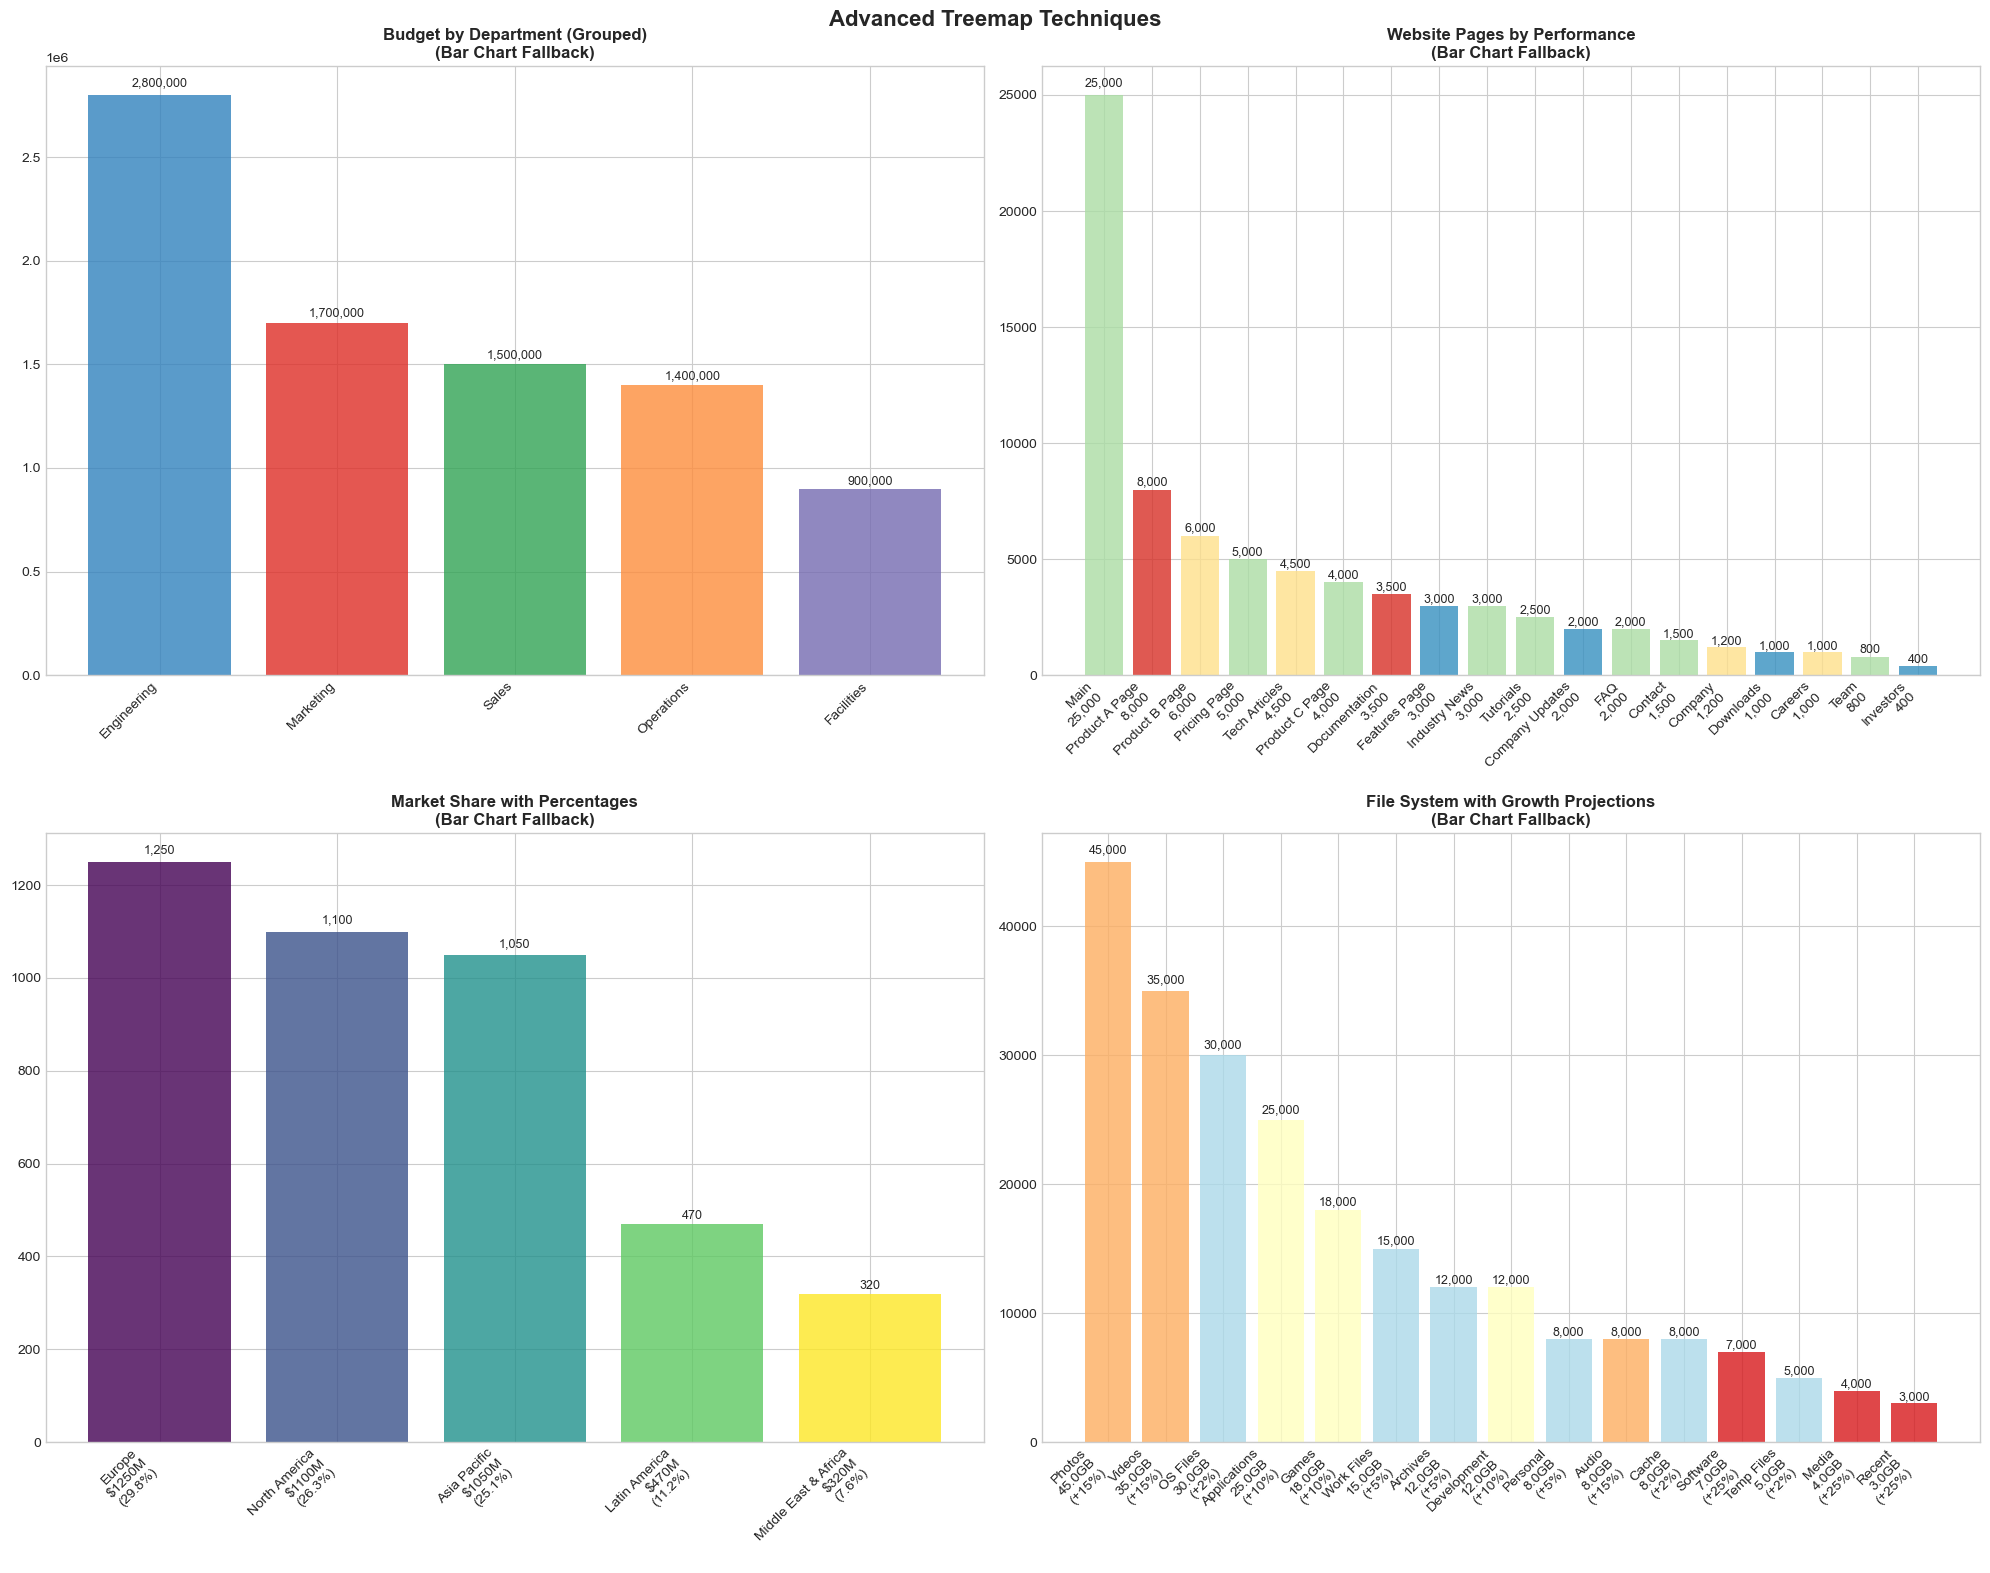

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Treemap Techniques', fontsize=16, fontweight='bold')

if not SQUARIFY_AVAILABLE:
    print("⚠️  Advanced treemap features limited without squarify")
    print("   Using simplified visualizations")

# 1. Nested/Hierarchical Treemap (Budget breakdown)
ax1 = axes[0, 0]

if SQUARIFY_AVAILABLE:
    # Create a more detailed treemap showing department > category hierarchy
    # Use different shades for different departments
    dept_colors = {'Engineering': 'Blues', 'Marketing': 'Reds', 'Sales': 'Greens', 
                   'Operations': 'Oranges', 'Facilities': 'Purples'}

    # Prepare data for nested visualization
    sizes = budget_df['Amount'].values
    labels = [f'{row.Category}\n${row.Amount/1000:.0f}K' for _, row in budget_df.iterrows()]

    # Create color mapping based on departments
    colors_nested = []
    for _, row in budget_df.iterrows():
        dept = row['Department']
        # Get color from department color map
        if dept == 'Engineering':
            colors_nested.append('#3182bd')
        elif dept == 'Marketing':
            colors_nested.append('#de2d26')
        elif dept == 'Sales':
            colors_nested.append('#31a354')
        elif dept == 'Operations':
            colors_nested.append('#fd8d3c')
        else:  # Facilities
            colors_nested.append('#756bb1')

    squarify.plot(sizes=sizes, label=labels, color=colors_nested, alpha=0.7, ax=ax1)
    ax1.set_title('Detailed Budget Breakdown\n(Color-coded by Department)', fontsize=12, fontweight='bold')
    ax1.axis('off')
else:
    # Fallback: grouped bar chart by department
    dept_grouped = budget_df.groupby('Department')['Amount'].sum().sort_values(ascending=False)
    colors_fallback = ['#3182bd', '#de2d26', '#31a354', '#fd8d3c', '#756bb1'][:len(dept_grouped)]
    create_fallback_treemap(dept_grouped.values, dept_grouped.index, colors_fallback, ax1,
                           'Budget by Department (Grouped)')

# 2. Proportional Treemap with Value Overlay
ax2 = axes[1, 0]

# Market share with revenue and percentage information
market_totals = market_df.groupby('Region').agg({
    'Revenue': 'sum',
    'Product': 'count'
}).sort_values('Revenue', ascending=False)

total_revenue = market_totals['Revenue'].sum()
sizes = market_totals['Revenue'].values
percentages = (sizes / total_revenue) * 100

labels_with_pct = [f'{region}\n${rev}M\n({pct:.1f}%)' 
                   for region, (rev, pct) in zip(market_totals.index, 
                                               zip(market_totals['Revenue'], percentages))]

colors_market = plt.cm.viridis(np.linspace(0, 1, len(market_totals)))

if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=sizes, label=labels_with_pct, color=colors_market, alpha=0.8, ax=ax2)
    ax2.set_title('Market Share with Percentages\n(Proportional Areas)', fontsize=12, fontweight='bold')
    ax2.axis('off')
else:
    create_fallback_treemap(sizes, labels_with_pct, colors_market, ax2,
                           'Market Share with Percentages')

# 3. Performance-based Color Coding
ax3 = axes[0, 1]

# Website pages with performance metrics (visits per page)
web_performance = web_df.copy()
web_performance['Performance'] = web_performance['Visits'] / web_performance.groupby('Section')['Visits'].transform('mean')

# Color based on performance relative to section average
performance_colors = []
for _, row in web_performance.iterrows():
    if row['Performance'] > 1.5:
        performance_colors.append('#d73027')  # High performing - red
    elif row['Performance'] > 1.0:
        performance_colors.append('#fee08b')  # Above average - yellow
    elif row['Performance'] > 0.7:
        performance_colors.append('#abdda4')  # Below average - light green
    else:
        performance_colors.append('#3690c0')  # Low performing - blue

sizes_web = web_performance['Visits'].values
labels_web = [f'{row.Page}\n{row.Visits:,}' for _, row in web_performance.iterrows()]

if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=sizes_web, label=labels_web, color=performance_colors, alpha=0.8, ax=ax3)
    ax3.set_title('Website Pages by Performance\n(Red=High, Yellow=Above Avg, Green=Below Avg, Blue=Low)', 
                  fontsize=10, fontweight='bold')
    ax3.axis('off')
else:
    create_fallback_treemap(sizes_web, labels_web, performance_colors, ax3,
                           'Website Pages by Performance')

# 4. Growth/Change Treemap
ax4 = axes[1, 1]

# Simulate growth data for file categories
file_growth = file_df.copy()
# Add simulated growth rates
growth_rates = {'Documents': 0.05, 'Media': 0.15, 'Software': 0.10, 
                'System': 0.02, 'Downloads': 0.25}
file_growth['Growth_Rate'] = file_growth['Category'].map(growth_rates)
file_growth['Projected_Size'] = file_growth['Size_MB'] * (1 + file_growth['Growth_Rate'])

# Color based on growth rate
growth_colors = []
for _, row in file_growth.iterrows():
    growth = row['Growth_Rate']
    if growth > 0.2:
        growth_colors.append('#d7191c')  # High growth - red
    elif growth > 0.1:
        growth_colors.append('#fdae61')  # Medium growth - orange
    elif growth > 0.05:
        growth_colors.append('#ffffbf')  # Low growth - yellow
    else:
        growth_colors.append('#abd9e9')  # Minimal growth - light blue

sizes_growth = file_growth['Size_MB'].values
labels_growth = [f'{row.Type}\n{row.Size_MB/1000:.1f}GB\n(+{row.Growth_Rate*100:.0f}%)' 
                for _, row in file_growth.iterrows()]

if SQUARIFY_AVAILABLE:
    squarify.plot(sizes=sizes_growth, label=labels_growth, color=growth_colors, alpha=0.8, ax=ax4)
    ax4.set_title('File System with Growth Projections\n(Color indicates growth rate)', 
                  fontsize=12, fontweight='bold')
    ax4.axis('off')
else:
    create_fallback_treemap(sizes_growth, labels_growth, growth_colors, ax4,
                           'File System with Growth Projections')

plt.tight_layout()
plt.show()


In [6]:
# Interactive treemap examples (code structure for Plotly)
print("Interactive Treemap Visualizations (Plotly):")
print("=" * 50)

print("\n1. Hierarchical Budget Treemap")
print("Code structure:")
print("""
fig = px.treemap(budget_df, 
                path=['Department', 'Category'], 
                values='Amount',
                title='Company Budget Hierarchy',
                color='Amount',
                color_continuous_scale='RdYlBu')
fig.show()
""")
print("Features: Drill-down capability, hover information, color scaling")

print("\n2. Sunburst Chart (Alternative to Treemap)")
print("Code structure:")
print("""
fig = px.sunburst(market_df,
                 path=['Region', 'Product'], 
                 values='Revenue',
                 title='Global Market Share Breakdown',
                 color='Revenue',
                 color_continuous_scale='Viridis')
fig.show()
""")
print("Features: Radial hierarchy, smooth transitions, proportional segments")

# Create summary statistics for treemap effectiveness
print("\n3. TREEMAP DATA ANALYSIS:")
print("=" * 30)

datasets = {
    'Budget': (budget_df, 'Amount', 'Department'),
    'Market': (market_df, 'Revenue', 'Region'),
    'Website': (web_df, 'Visits', 'Section'),
    'Files': (file_df, 'Size_MB', 'Category')
}

for name, (df, value_col, group_col) in datasets.items():
    print(f"\n{name} Dataset Analysis:")
    
    # Calculate hierarchy statistics
    total_value = df[value_col].sum()
    num_categories = df[group_col].nunique()
    num_items = len(df)
    
    # Calculate distribution
    group_totals = df.groupby(group_col)[value_col].sum().sort_values(ascending=False)
    largest_category = group_totals.iloc[0]
    smallest_category = group_totals.iloc[-1]
    concentration = (group_totals.iloc[0] / total_value) * 100
    
    print(f"  Total value: {total_value:,}")
    print(f"  Categories: {num_categories}, Items: {num_items}")
    print(f"  Largest category: {largest_category:,} ({concentration:.1f}% of total)")
    print(f"  Distribution ratio: {largest_category/smallest_category:.1f}:1")
    
    # Calculate Gini coefficient for inequality
    values = group_totals.values
    n = len(values)
    sorted_values = np.sort(values)
    cumsum = np.cumsum(sorted_values)
    gini = (2 * np.sum((np.arange(1, n+1) * sorted_values))) / (n * np.sum(sorted_values)) - (n+1)/n
    
    inequality = "High" if gini > 0.5 else "Medium" if gini > 0.3 else "Low"
    print(f"  Inequality (Gini): {gini:.3f} ({inequality})")
    
    # Treemap suitability
    if num_items <= 30 and largest_category/smallest_category <= 100:
        suitability = "Excellent"
    elif num_items <= 50 and largest_category/smallest_category <= 500:
        suitability = "Good"
    else:
        suitability = "Consider alternatives"
    
    print(f"  Treemap suitability: {suitability}")


Interactive Treemap Visualizations (Plotly):

1. Hierarchical Budget Treemap
Code structure:

fig = px.treemap(budget_df, 
                path=['Department', 'Category'], 
                values='Amount',
                title='Company Budget Hierarchy',
                color='Amount',
                color_continuous_scale='RdYlBu')
fig.show()

Features: Drill-down capability, hover information, color scaling

2. Sunburst Chart (Alternative to Treemap)
Code structure:

fig = px.sunburst(market_df,
                 path=['Region', 'Product'], 
                 values='Revenue',
                 title='Global Market Share Breakdown',
                 color='Revenue',
                 color_continuous_scale='Viridis')
fig.show()

Features: Radial hierarchy, smooth transitions, proportional segments

3. TREEMAP DATA ANALYSIS:

Budget Dataset Analysis:
  Total value: 8,300,000
  Categories: 5, Items: 19
  Largest category: 2,800,000 (33.7% of total)
  Distribution ratio: 3.1:1
  Inequalit

In [7]:
# Statistical analysis and best practices
print("Treemap Design and Analysis Guidelines:")
print("=" * 50)

# 1. Hierarchy Analysis
print("1. HIERARCHY STRUCTURE ANALYSIS:")

def analyze_hierarchy(df, parent_col, child_col, value_col):
    """Analyze hierarchical structure for treemap suitability"""
    
    # Parent level analysis
    parent_stats = df.groupby(parent_col).agg({
        value_col: ['sum', 'count', 'std'],
        child_col: 'nunique'
    }).round(2)
    
    print(f"   Parent Level ({parent_col}):")
    print(f"     Categories: {df[parent_col].nunique()}")
    print(f"     Average children per parent: {df.groupby(parent_col)[child_col].nunique().mean():.1f}")
    
    # Value distribution
    total_value = df[value_col].sum()
    parent_totals = df.groupby(parent_col)[value_col].sum().sort_values(ascending=False)
    
    print(f"   Value Distribution:")
    print(f"     Top 3 categories: {(parent_totals.head(3).sum()/total_value)*100:.1f}% of total")
    print(f"     Bottom 50%: {(parent_totals.tail(len(parent_totals)//2).sum()/total_value)*100:.1f}% of total")
    
    return parent_totals

# Analyze each dataset
print(f"\nBudget Hierarchy:")
budget_analysis = analyze_hierarchy(budget_df, 'Department', 'Category', 'Amount')

print(f"\nMarket Hierarchy:")
market_analysis = analyze_hierarchy(market_df, 'Region', 'Product', 'Revenue')

print(f"\nWebsite Hierarchy:")
web_analysis = analyze_hierarchy(web_df, 'Section', 'Page', 'Visits')

print(f"\nFile System Hierarchy:")
file_analysis = analyze_hierarchy(file_df, 'Category', 'Type', 'Size_MB')

# 2. Visual Effectiveness Analysis
print(f"\n2. VISUAL EFFECTIVENESS METRICS:")

def calculate_visual_metrics(values, labels):
    """Calculate metrics for treemap visual effectiveness"""
    
    # Size ratio analysis
    max_val = max(values)
    min_val = min(values)
    size_ratio = max_val / min_val
    
    # Area calculation (for square visualization)
    areas = [np.sqrt(v) for v in values]
    area_ratio = max(areas) / min(areas)
    
    # Label fit analysis (rough estimate)
    avg_label_length = np.mean([len(str(label)) for label in labels])
    
    return {
        'size_ratio': size_ratio,
        'area_ratio': area_ratio,
        'avg_label_length': avg_label_length,
        'num_elements': len(values)
    }

# Analyze visual effectiveness for each dataset
datasets_visual = {
    'Budget (Dept Level)': (budget_analysis.values, budget_analysis.index),
    'Market (Region Level)': (market_analysis.values, market_analysis.index),
    'Website (Section Level)': (web_analysis.values, web_analysis.index),
    'Files (Category Level)': (file_analysis.values, file_analysis.index)
}

for name, (values, labels) in datasets_visual.items():
    metrics = calculate_visual_metrics(values, labels)
    
    print(f"\n   {name}:")
    print(f"     Size ratio: {metrics['size_ratio']:.1f}:1")
    print(f"     Area ratio: {metrics['area_ratio']:.1f}:1")
    print(f"     Elements: {metrics['num_elements']}")
    print(f"     Avg label length: {metrics['avg_label_length']:.1f} chars")
    
    # Effectiveness rating
    if metrics['size_ratio'] <= 10 and metrics['num_elements'] <= 12:
        effectiveness = "Excellent"
    elif metrics['size_ratio'] <= 50 and metrics['num_elements'] <= 20:
        effectiveness = "Good"
    elif metrics['size_ratio'] <= 100:
        effectiveness = "Acceptable"
    else:
        effectiveness = "Consider alternatives"
    
    print(f"     Visual effectiveness: {effectiveness}")

# 3. Design Recommendations
print(f"\n3. TREEMAP DESIGN RECOMMENDATIONS:")
print("=" * 40)

print("✓ Optimal Characteristics:")
print("  • 3-15 top-level categories")
print("  • Size ratios less than 100:1")
print("  • Maximum 2-3 hierarchy levels")
print("  • Clear, concise labels")
print("  • Meaningful color coding")

print("\n✓ Color Strategy:")
print("  • Use categorical colors for groups")
print("  • Use sequential colors for values")
print("  • Use diverging colors for comparisons")
print("  • Ensure accessibility (colorblind-friendly)")

print("\n✓ Label Strategy:")
print("  • Include key metrics in labels")
print("  • Use abbreviations for space")
print("  • Consider font size scaling")
print("  • Provide tooltips for details")

print("\n✓ Interaction Features:")
print("  • Drill-down capability")
print("  • Zoom and pan for large datasets")
print("  • Hover information")
print("  • Filter and search")

print("\n✓ When to Use Treemaps:")
print("  • Hierarchical data with quantitative values")
print("  • Part-to-whole relationships")
print("  • Space-efficient visualization needed")
print("  • Proportional comparison important")

print("\n⚠ When to Consider Alternatives:")
print("  • Too many small categories (>50)")
print("  • Extreme size differences (>1000:1)")
print("  • Time series data")
print("  • Precise value comparison needed")

print("\n🔄 Alternative Visualizations:")
print("  • Sunburst charts (radial hierarchy)")
print("  • Icicle plots (linear hierarchy)")
print("  • Nested bar charts")
print("  • Network diagrams")
print("  • Sankey diagrams (for flows)")

# 4. Performance Insights
print(f"\n4. BUSINESS INSIGHTS FROM TREEMAPS:")
print("=" * 40)

print("Budget Analysis Insights:")
dept_pct = (budget_analysis / budget_analysis.sum()) * 100
for dept, pct in dept_pct.items():
    if pct > 25:
        priority = "High"
    elif pct > 15:
        priority = "Medium"
    else:
        priority = "Low"
    print(f"  • {dept}: {pct:.1f}% of budget ({priority} priority)")

print(f"\nMarket Analysis Insights:")
market_pct = (market_analysis / market_analysis.sum()) * 100
growth_potential = market_pct.sort_values(ascending=True)
print(f"  • Largest market: {market_pct.idxmax()} ({market_pct.max():.1f}%)")
print(f"  • Growth opportunity: {growth_potential.index[0]} ({growth_potential.iloc[0]:.1f}%)")

print(f"\nWebsite Analysis Insights:")
web_pct = (web_analysis / web_analysis.sum()) * 100
for section, pct in web_pct.items():
    if section == 'Homepage':
        efficiency = "Expected (landing page)"
    elif pct > 30:
        efficiency = "High traffic driver"
    elif pct > 15:
        efficiency = "Moderate performance"
    else:
        efficiency = "Optimization opportunity"
    print(f"  • {section}: {pct:.1f}% of traffic ({efficiency})")

if not SQUARIFY_AVAILABLE:
    print(f"\n📦 Optional Dependencies:")
    print("   For full treemap functionality, install squarify:")
    print("   pip install squarify")
    print("   conda install -c conda-forge squarify")
    print("   Note: Current examples use bar chart fallbacks")


Treemap Design and Analysis Guidelines:
1. HIERARCHY STRUCTURE ANALYSIS:

Budget Hierarchy:
   Parent Level (Department):
     Categories: 5
     Average children per parent: 3.8
   Value Distribution:
     Top 3 categories: 72.3% of total
     Bottom 50%: 27.7% of total

Market Hierarchy:
   Parent Level (Region):
     Categories: 5
     Average children per parent: 4.0
   Value Distribution:
     Top 3 categories: 81.1% of total
     Bottom 50%: 18.9% of total

Website Hierarchy:
   Parent Level (Section):
     Categories: 5
     Average children per parent: 3.6
   Value Distribution:
     Top 3 categories: 84.7% of total
     Bottom 50%: 15.3% of total

File System Hierarchy:
   Parent Level (Category):
     Categories: 5
     Average children per parent: 3.0
   Value Distribution:
     Top 3 categories: 79.1% of total
     Bottom 50%: 20.9% of total

2. VISUAL EFFECTIVENESS METRICS:

   Budget (Dept Level):
     Size ratio: 3.1:1
     Area ratio: 1.8:1
     Elements: 5
     Avg lab